## Setup and Imports

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

## 2. Overview of the Data

In [2]:
# Load the dataset
df = pd.read_csv('../data/raw/data.csv') 

# 2.1 Understand the structure of the dataset
print("=" * 80)
print("DATASET STRUCTURE")
print("=" * 80)

# Basic information
print(f"Dataset Shape: {df.shape}")
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print()

# Column information
print("Column Names and Data Types:")
print("-" * 40)
print(df.dtypes.to_string())
print()

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())

# %%
# 2.2 Check for duplicate transactions
print("=" * 80)
print("DATA QUALITY CHECKS")
print("=" * 80)

# Check for duplicate Transaction IDs
duplicate_ids = df['TransactionId'].duplicated().sum()
print(f"Duplicate Transaction IDs: {duplicate_ids}")

# Check for duplicate rows (all columns)
duplicate_rows = df.duplicated().sum()
print(f"Duplicate rows (all columns identical): {duplicate_rows}")

# Check if TransactionId is unique
is_transaction_id_unique = (df['TransactionId'].nunique() == len(df))
print(f"TransactionId is unique: {is_transaction_id_unique}")

# %%
# 2.3 Basic information about each column
print("\nColumn Details:")
print("-" * 40)
for col in df.columns:
    unique_count = df[col].nunique()
    data_type = df[col].dtype
    print(f"{col:<25} | Type: {str(data_type):<10} | Unique values: {unique_count:>5}")
    
    # For columns with few unique values, show them
    if unique_count <= 10:
        unique_vals = df[col].unique()
        print(f"   Values: {unique_vals}")


DATASET STRUCTURE
Dataset Shape: (95662, 16)
Number of rows: 95,662
Number of columns: 16

Column Names and Data Types:
----------------------------------------
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64

First 5 rows of the dataset:
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   Sub

### 3. Summary Statistics

In [3]:
# 3.1 Overall summary statistics for numerical features
print("=" * 80)
print("SUMMARY STATISTICS - NUMERICAL FEATURES")
print("=" * 80)

# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

# Calculate summary statistics
summary_stats = df[numerical_cols].describe().T
summary_stats['skew'] = df[numerical_cols].skew()
summary_stats['kurtosis'] = df[numerical_cols].kurtosis()

# Display formatted summary statistics
print("\nDetailed Statistics:")
print(summary_stats[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'skew', 'kurtosis']].round(2))

# %%
# 3.2 Summary statistics for categorical features
print("\n" + "=" * 80)
print("SUMMARY STATISTICS - CATEGORICAL FEATURES")
print("=" * 80)

# Select categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"  Unique values: {df[col].nunique()}")
    
    if df[col].nunique() <= 10:
        value_counts = df[col].value_counts()
        for val, count in value_counts.items():
            percentage = (count / len(df)) * 100
            print(f"  {val}: {count} ({percentage:.1f}%)")

SUMMARY STATISTICS - NUMERICAL FEATURES
Numerical columns: ['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']

Detailed Statistics:
                   count     mean        std        min    25%     50%  \
CountryCode      95662.0   256.00       0.00      256.0  256.0   256.0   
Amount           95662.0  6717.85  123306.80 -1000000.0  -50.0  1000.0   
Value            95662.0  9900.58  123122.09        2.0  275.0  1000.0   
PricingStrategy  95662.0     2.26       0.73        0.0    2.0     2.0   
FraudResult      95662.0     0.00       0.04        0.0    0.0     0.0   

                    75%        max   skew  kurtosis  
CountryCode       256.0      256.0   0.00      0.00  
Amount           2800.0  9880000.0  51.10   3363.13  
Value            5000.0  9880000.0  51.29   3378.07  
PricingStrategy     2.0        4.0   1.66      2.09  
FraudResult         0.0        1.0  22.20    490.69  

SUMMARY STATISTICS - CATEGORICAL FEATURES
Categorical columns: ['TransactionId',

### 4. Distribution of Numerical Features

DISTRIBUTION OF NUMERICAL FEATURES


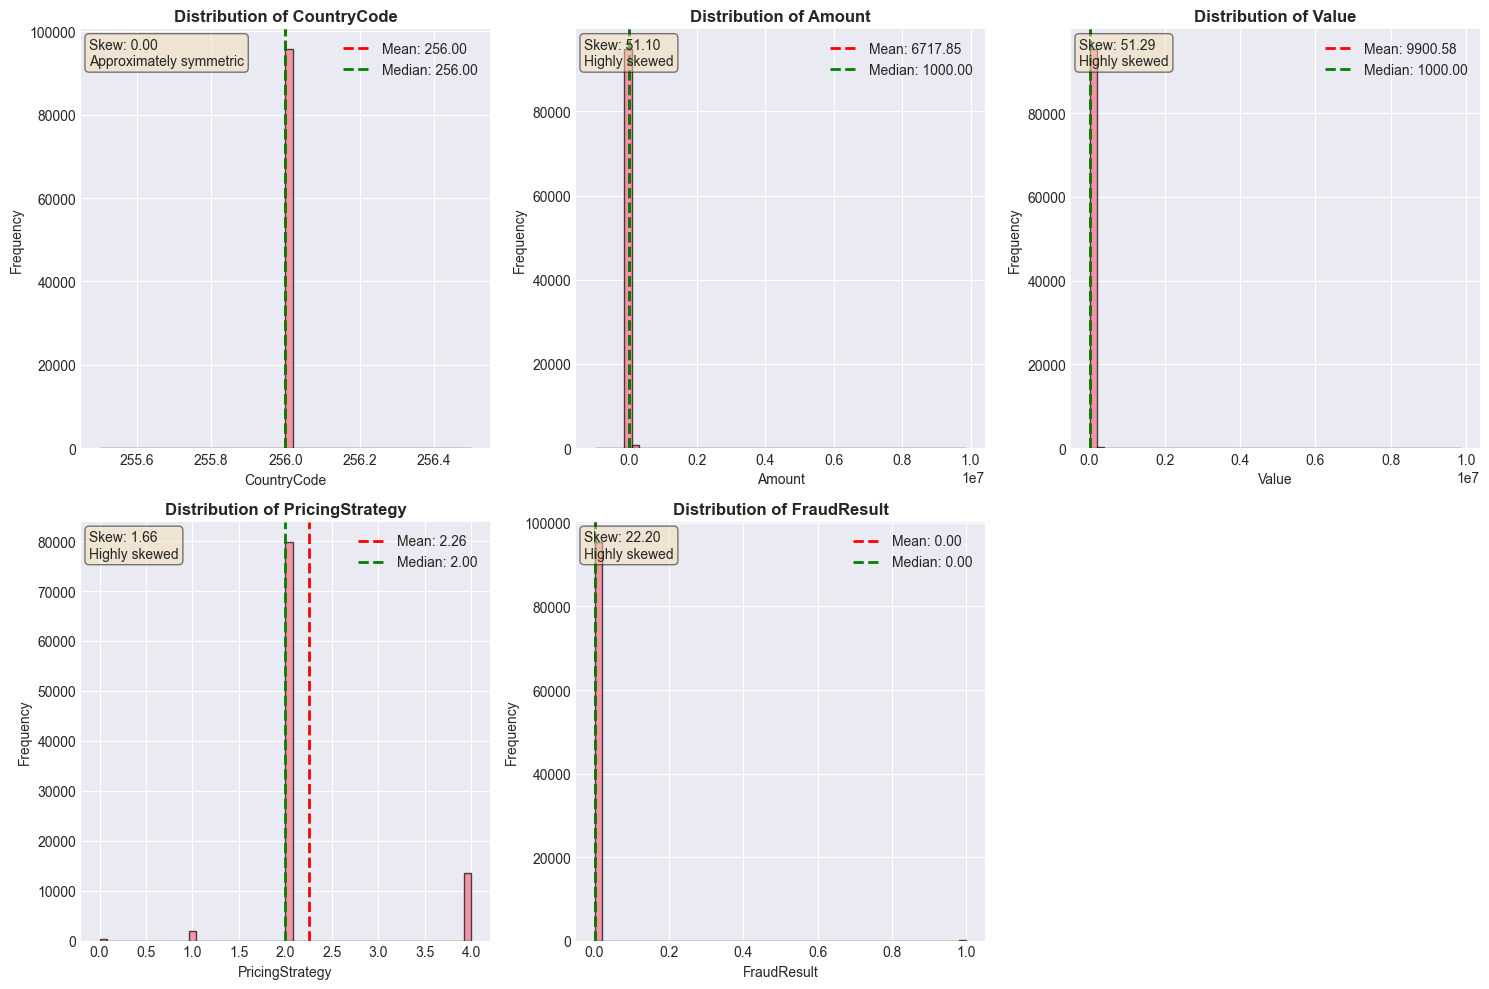

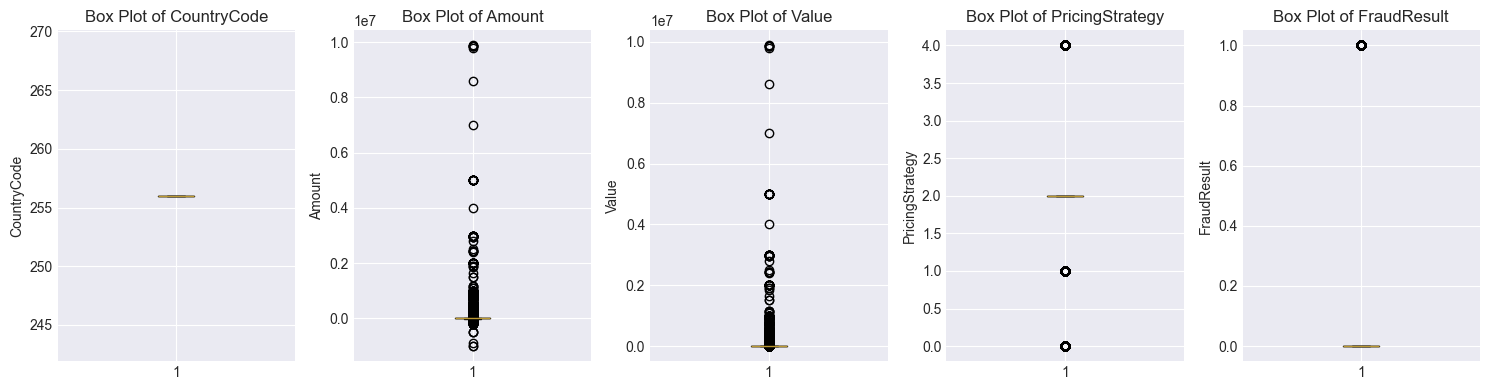

In [4]:
# 4.1 Create histograms for all numerical features
print("=" * 80)
print("DISTRIBUTION OF NUMERICAL FEATURES")
print("=" * 80)

# Set up subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        ax = axes[idx]
        
        # Create histogram
        df[col].hist(bins=50, ax=ax, edgecolor='black', alpha=0.7)
        ax.set_title(f'Distribution of {col}', fontweight='bold')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        
        # Add statistics to plot
        mean_val = df[col].mean()
        median_val = df[col].median()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
        ax.legend()
        
        # Check for skewness
        skewness = float(df[col].skew())
        if abs(skewness) > 1:
            skew_label = 'Highly skewed'
        elif abs(skewness) > 0.5:
            skew_label = 'Moderately skewed'
        else:
            skew_label = 'Approximately symmetric'
        
        ax.text(0.02, 0.98, f'Skew: {skewness:.2f}\n{skew_label}', 
                transform=ax.transAxes, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Hide unused subplots
for i in range(len(numerical_cols), len(axes)):
    axes[i].set_visible(False)
    
plt.tight_layout()
plt.savefig('../plots/numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# 4.2 Box plots for outlier detection
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(15, 4))
for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df[col].dropna())
    axes[idx].set_title(f'Box Plot of {col}')
    axes[idx].set_ylabel(col)
plt.tight_layout()
plt.show()

### 5. Distribution of Categorical Features

DISTRIBUTION OF CATEGORICAL FEATURES


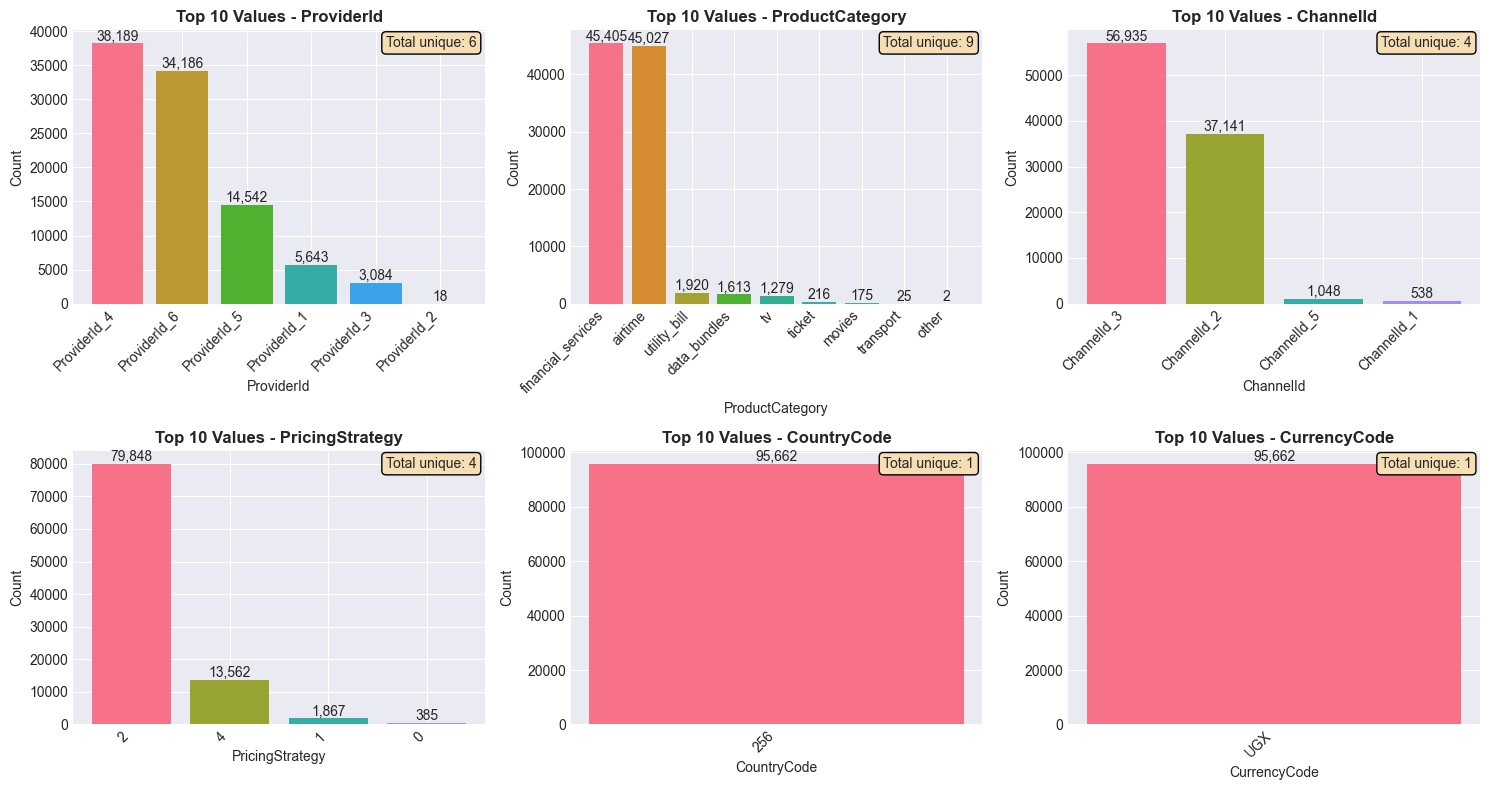

In [5]:
# 5.1 Distribution of categorical features
print("=" * 80)
print("DISTRIBUTION OF CATEGORICAL FEATURES")
print("=" * 80)

# Select categorical features (excluding ID columns)
categorical_features = ['ProviderId', 'ProductCategory', 'ChannelId', 
                        'PricingStrategy', 'CountryCode', 'CurrencyCode']

# Calculate number of subplots needed
n_cols = 3
n_rows = (len(categorical_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for idx, col in enumerate(categorical_features):
    ax = axes[idx]
    
    # Get value counts
    value_counts = df[col].value_counts().head(10)  # Top 10 values
    
    # Create bar plot
    bars = ax.bar(range(len(value_counts)), value_counts.values, 
                  color=sns.color_palette("husl", len(value_counts)))
    ax.set_title(f'Top 10 Values - {col}', fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    
    # Add value labels on bars
    for i, (bar, count) in enumerate(zip(bars, value_counts.values)):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{count:,}', ha='center', va='bottom', fontsize=10)
    
    # Set x-tick labels
    ax.set_xticks(range(len(value_counts)))
    ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
    
    # Add percentage information
    total = len(df)
    ax.text(0.98, 0.98, f'Total unique: {df[col].nunique()}', 
            transform=ax.transAxes, verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=1))

# Hide unused subplots
for idx in range(len(categorical_features), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig('../plots/categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()


### 6. Correlation Analysis

CORRELATION ANALYSIS
Correlation Matrix:
                 Amount  Value  PricingStrategy  FraudResult
Amount            1.000  0.990           -0.062        0.557
Value             0.990  1.000           -0.017        0.567
PricingStrategy  -0.062 -0.017            1.000       -0.034
FraudResult       0.557  0.567           -0.034        1.000


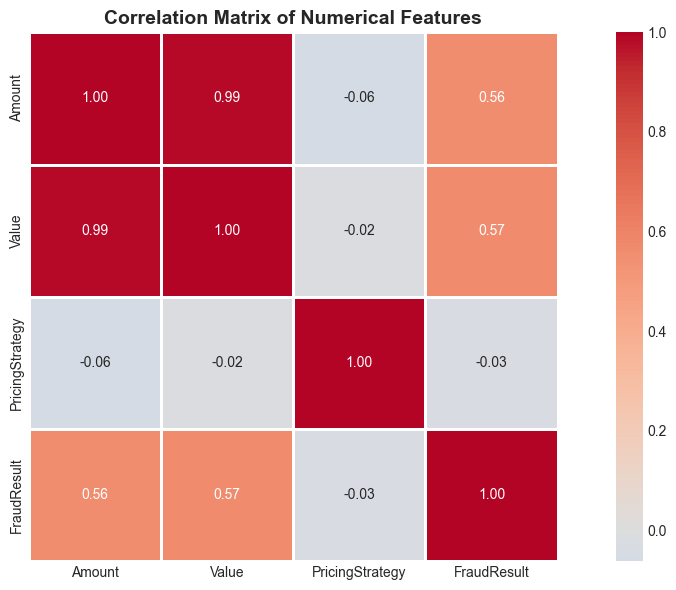


Highly Correlated Feature Pairs (|correlation| > 0.7):
--------------------------------------------------
Amount & Value: 0.990

Scatter plots for feature relationships:
----------------------------------------


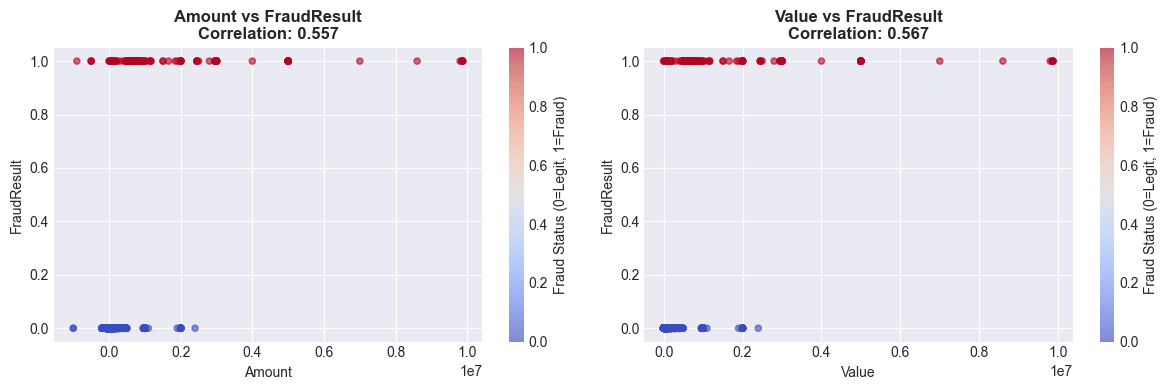

In [6]:
# 6.1 Correlation matrix for numerical features
print("=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

# Calculate correlation matrix by selecting only numeric columns with more than one unique value
valid_numerical_cols = [col for col in numerical_cols if df[col].nunique(dropna=True) > 1]
correlation_matrix = df[valid_numerical_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix.round(3))

# %%
# 6.2 Visualize correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1)
plt.title('Correlation Matrix of Numerical Features', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.savefig('../plots/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


# 6.3 Identify highly correlated features
print("\nHighly Correlated Feature Pairs (|correlation| > 0.7):")
print("-" * 50)

high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = abs(correlation_matrix.iloc[i, j])
        if corr_value > 0.7:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

if high_corr_pairs:
    for feature1, feature2, corr in high_corr_pairs:
        print(f"{feature1} & {feature2}: {corr:.3f}")
else:
    print("No highly correlated feature pairs found (|correlation| > 0.7).")


# 6.4 Scatter plots for correlated features
print("\nScatter plots for feature relationships:")
print("-" * 40)

# Find features with moderate to high correlation
moderate_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = abs(correlation_matrix.iloc[i, j])
        if 0.3 < corr_value < 0.7:  # Moderate correlation
            moderate_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

# Plot first 2 moderate correlation pairs
if moderate_corr_pairs:
    n_pairs = min(2, len(moderate_corr_pairs))
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    axes = axes.flatten()
    
    for idx, (feature1, feature2, corr) in enumerate(moderate_corr_pairs[:n_pairs]):
        ax = axes[idx]
        
        # Create scatter plot colored by fraud status
        scatter = ax.scatter(df[feature1], df[feature2], 
                           c=df['FraudResult'], 
                           alpha=0.6, cmap='coolwarm', s=20)
        ax.set_xlabel(feature1)
        ax.set_ylabel(feature2)
        ax.set_title(f'{feature1} vs {feature2}\nCorrelation: {corr:.3f}', fontweight='bold')
        
        # Add colorbar for fraud status
        cbar = plt.colorbar(scatter, ax=ax)
        cbar.set_label('Fraud Status (0=Legit, 1=Fraud)')
    
    plt.tight_layout()
    plt.savefig('../plots/scatter_plots_correlated_features.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("No moderately correlated feature pairs found (0.3 < |correlation| < 0.7).")


### 7. Idenfiying Missing Values

In [7]:
# 7.1 Check for missing values
print("=" * 80)
print("MISSING VALUES ANALYSIS")
print("=" * 80)

# Calculate missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create missing values summary
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Filter to show only columns with missing values
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]

if len(missing_summary) > 0:
    print("Columns with missing values:")
    print(missing_summary.sort_values('Missing Values', ascending=False))
    
    # Visualize missing values
    plt.figure(figsize=(10, 6))
    missing_summary['Percentage'].sort_values(ascending=False).plot(kind='bar')
    plt.title('Percentage of Missing Values by Column', fontweight='bold')
    plt.ylabel('Percentage Missing')
    plt.xlabel('Column')
    plt.axhline(y=5, color='red', linestyle='--', alpha=0.7, label='5% threshold')
    plt.legend()
    plt.tight_layout()
    plt.savefig('missing_values.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("\n⚠️  Missing values detected! Consider appropriate imputation strategies.")
else:
    print("No missing values found in the dataset!")
    print("✅ Data quality is good in terms of completeness.")

# 7.2 Check for potential placeholders/indicators of missing data
print("\nChecking for potential placeholders/indicators of missing data:")
print("-" * 60)

# Common placeholders to check
placeholders_to_check = [-999, -1, 0, '', 'NA', 'N/A', 'null', 'NULL', 'NaN', '?']

potential_placeholders = {}
for col in df.columns:
    for placeholder in placeholders_to_check:
        if placeholder in df[col].values:
            count = (df[col] == placeholder).sum()
            if count > 0:
                if col not in potential_placeholders:
                    potential_placeholders[col] = {}
                potential_placeholders[col][placeholder] = count

if potential_placeholders:
    print("Potential placeholders found:")
    for col, placeholders in potential_placeholders.items():
        print(f"\n{col}:")
        for placeholder, count in placeholders.items():
            percentage = (count / len(df)) * 100
            print(f"  '{placeholder}': {count} occurrences ({percentage:.2f}%)")
else:
    print("No common placeholders found.")


MISSING VALUES ANALYSIS
No missing values found in the dataset!
✅ Data quality is good in terms of completeness.

Checking for potential placeholders/indicators of missing data:
------------------------------------------------------------
Potential placeholders found:

PricingStrategy:
  '0': 385 occurrences (0.40%)

FraudResult:
  '0': 95469 occurrences (99.80%)


### 8. Outlier Detection

OUTLIER DETECTION


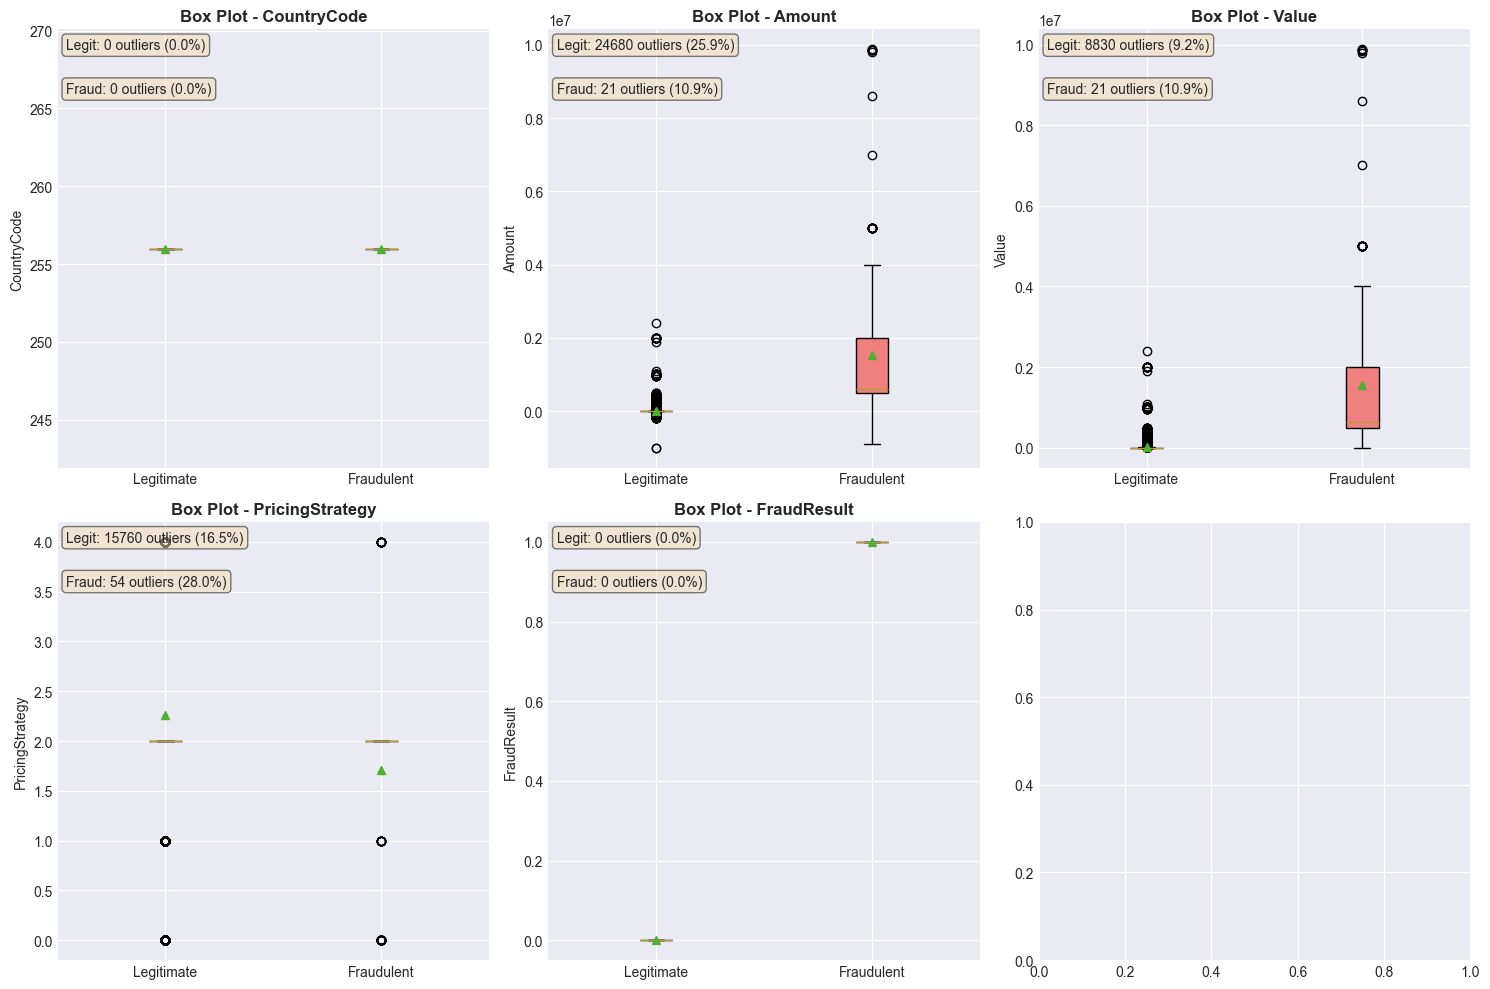


Statistical Outlier Analysis:
----------------------------------------

CountryCode:
  Q1: 256.00, Q3: 256.00, IQR: 0.00
  Lower bound: 256.00, Upper bound: 256.00
  Outliers: 0 (0.00%)

Amount:
  Q1: -50.00, Q3: 2800.00, IQR: 2850.00
  Lower bound: -4325.00, Upper bound: 7075.00
  Outliers: 24441 (25.55%)
  Min outlier: -1000000.00
  Max outlier: 9880000.00
  191 outlier(s) are fraud (0.8% of outliers)

Value:
  Q1: 275.00, Q3: 5000.00, IQR: 4725.00
  Lower bound: -6812.50, Upper bound: 12087.50
  Outliers: 9021 (9.43%)
  Min outlier: 12300.00
  Max outlier: 9880000.00
  191 outlier(s) are fraud (2.1% of outliers)

PricingStrategy:
  Q1: 2.00, Q3: 2.00, IQR: 0.00
  Lower bound: 2.00, Upper bound: 2.00
  Outliers: 15814 (16.53%)
  Min outlier: 0.00
  Max outlier: 4.00
  54 outlier(s) are fraud (0.3% of outliers)

FraudResult:
  Q1: 0.00, Q3: 0.00, IQR: 0.00
  Lower bound: 0.00, Upper bound: 0.00
  Outliers: 193 (0.20%)
  Min outlier: 1.00
  Max outlier: 1.00
  193 outlier(s) are fraud

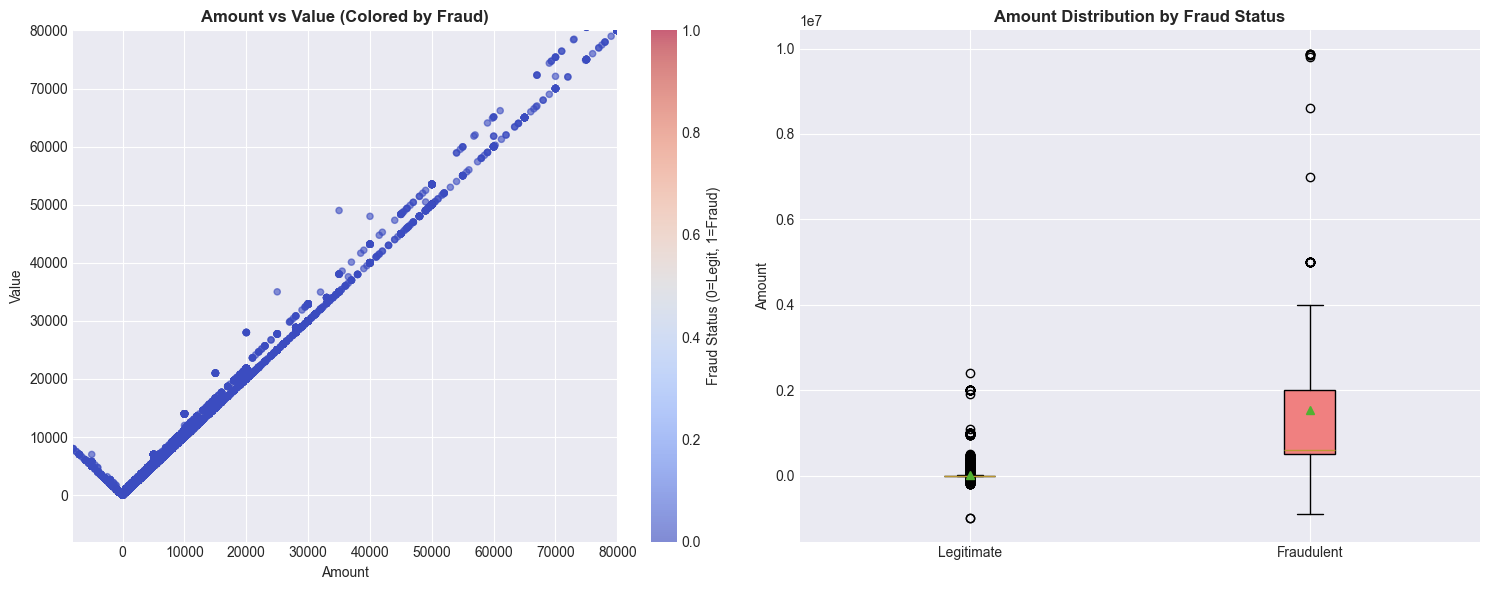

In [8]:
# 8.1 Outlier detection using box plots
print("=" * 80)
print("OUTLIER DETECTION")
print("=" * 80)

# Create box plots for numerical features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        ax = axes[idx]
        
        # Create box plot
        box_data = [df[df['FraudResult'] == 0][col].dropna(),
                   df[df['FraudResult'] == 1][col].dropna()]
        
        box = ax.boxplot(box_data, labels=['Legitimate', 'Fraudulent'], 
                        patch_artist=True, showmeans=True)
        
        # Color the boxes
        colors = ['lightblue', 'lightcoral']
        for patch, color in zip(box['boxes'], colors):
            patch.set_facecolor(color)
        
        ax.set_title(f'Box Plot - {col}', fontweight='bold')
        ax.set_ylabel(col)
        
        # Calculate and display outlier count
        for i, data in enumerate(box_data):
            Q1 = np.percentile(data, 25)
            Q3 = np.percentile(data, 75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = data[(data < lower_bound) | (data > upper_bound)]
            outlier_pct = (len(outliers) / len(data)) * 100
            
            label = 'Legit' if i == 0 else 'Fraud'
            ax.text(0.02, 0.98 - (i * 0.1), 
                   f'{label}: {len(outliers)} outliers ({outlier_pct:.1f}%)',
                   transform=ax.transAxes, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('../plots/outlier_detection_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

# 8.2 Statistical outlier detection
print("\nStatistical Outlier Analysis:")
print("-" * 40)

for col in numerical_cols:
    print(f"\n{col}:")
    
    # Calculate IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"  Outliers: {outlier_count} ({outlier_percentage:.2f}%)")
    
    if outlier_count > 0:
        print(f"  Min outlier: {outliers[col].min():.2f}")
        print(f"  Max outlier: {outliers[col].max():.2f}")
        
        # Check if outliers are mostly fraud
        fraud_outliers = outliers[outliers['FraudResult'] == 1]
        if len(fraud_outliers) > 0:
            fraud_outlier_pct = (len(fraud_outliers) / outlier_count) * 100
            print(f"  {len(fraud_outliers)} outlier(s) are fraud ({fraud_outlier_pct:.1f}% of outliers)")

# 8.3 Z-score based outlier detection
print("\nZ-score based Outlier Detection:")
print("-" * 40)

from scipy import stats

for col in numerical_cols:
    # Calculate z-scores
    z_scores = np.abs(stats.zscore(df[col].dropna()))
    
    # Identify outliers (z-score > 3)
    outlier_mask = z_scores > 3
    outlier_count = outlier_mask.sum()
    outlier_percentage = (outlier_count / len(df[col].dropna())) * 100
    
    if outlier_count > 0:
        print(f"{col}: {outlier_count} outliers detected ({outlier_percentage:.2f}%)")

# 8.4 Visualize outliers in Amount vs Value
print("\nVisualizing outliers in transaction amounts:")
print("-" * 40)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatter plot of Amount vs Value
scatter1 = ax1.scatter(df['Amount'], df['Value'], 
                      c=df['FraudResult'], alpha=0.6, cmap='coolwarm', s=20)
ax1.set_xlabel('Amount')
ax1.set_ylabel('Value')
ax1.set_title('Amount vs Value (Colored by Fraud)', fontweight='bold')
cbar1 = plt.colorbar(scatter1, ax=ax1)
cbar1.set_label('Fraud Status (0=Legit, 1=Fraud)')

# Zoom in on typical range
typical_max = df['Amount'].quantile(0.99)  # 99th percentile
ax1.set_xlim([-typical_max/10, typical_max])
ax1.set_ylim([-typical_max/10, typical_max])

# Box plot for Amount
box_data = [df[df['FraudResult'] == 0]['Amount'].dropna(),
           df[df['FraudResult'] == 1]['Amount'].dropna()]
box = ax2.boxplot(box_data, labels=['Legitimate', 'Fraudulent'], 
                 patch_artist=True, showmeans=True)
colors = ['lightblue', 'lightcoral']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
ax2.set_ylabel('Amount')
ax2.set_title('Amount Distribution by Fraud Status', fontweight='bold')

plt.tight_layout()
plt.savefig('../plots/amount_outliers_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


### 9. Time-Based Analysis

TIME-BASED ANALYSIS
Time range: 2018-11-15 02:18:49+00:00 to 2019-02-13 10:01:28+00:00
Data spans 91 day(s)
Hours covered: 0:00 to 23:00


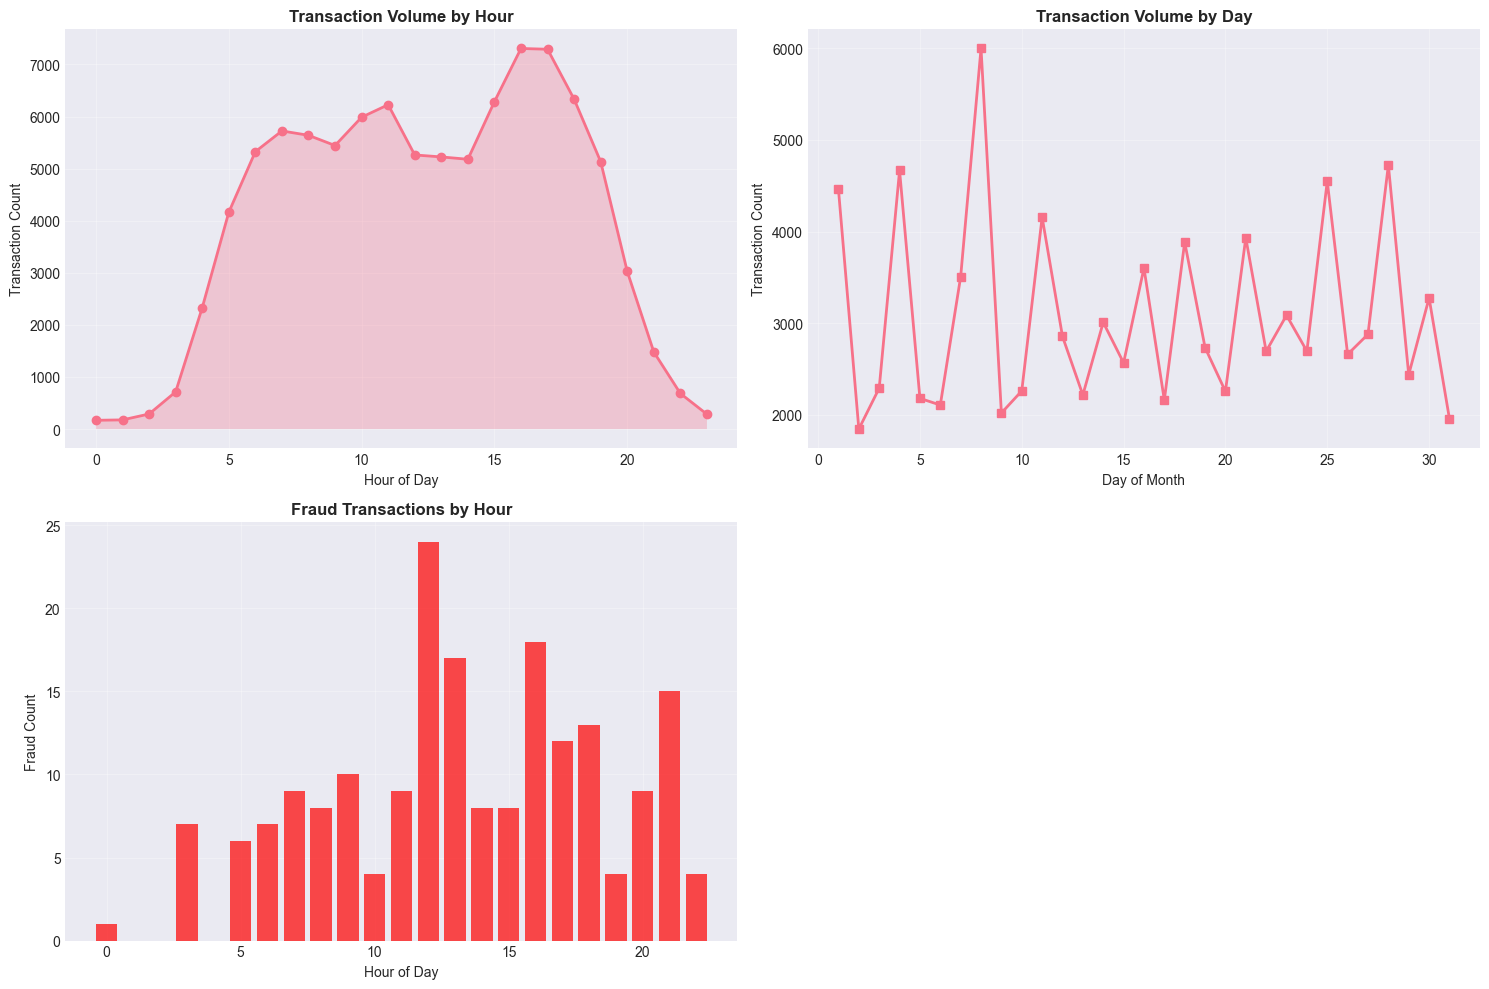

In [9]:
# 9.1 Convert TransactionStartTime to datetime
print("=" * 80)
print("TIME-BASED ANALYSIS")
print("=" * 80)

# Convert to datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

# Extract time features
df['Hour'] = df['TransactionStartTime'].dt.hour
df['DayOfWeek'] = df['TransactionStartTime'].dt.dayofweek  # Monday=0, Sunday=6
df['Day'] = df['TransactionStartTime'].dt.day
df['Month'] = df['TransactionStartTime'].dt.month
df['Date'] = df['TransactionStartTime'].dt.date

print(f"Time range: {df['TransactionStartTime'].min()} to {df['TransactionStartTime'].max()}")
print(f"Data spans {df['Date'].nunique()} day(s)")
print(f"Hours covered: {df['Hour'].min()}:00 to {df['Hour'].max()}:00")

# %%
# 9.2 Transaction patterns over time
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

# Hourly distribution
hourly_counts = df.groupby('Hour').size()
axes[0].plot(hourly_counts.index, hourly_counts.values, marker='o', linewidth=2)
axes[0].set_title('Transaction Volume by Hour', fontweight='bold')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Transaction Count')
axes[0].grid(True, alpha=0.3)
axes[0].fill_between(hourly_counts.index, 0, hourly_counts.values, alpha=0.3)

# Daily pattern (if multiple days)
if df['Day'].nunique() > 1:
    daily_counts = df.groupby('Day').size()
    axes[1].plot(daily_counts.index, daily_counts.values, marker='s', linewidth=2)
    axes[1].set_title('Transaction Volume by Day', fontweight='bold')
    axes[1].set_xlabel('Day of Month')
    axes[1].set_ylabel('Transaction Count')
    axes[1].grid(True, alpha=0.3)

# Fraud transactions over time
fraud_times = df[df['FraudResult'] == 1]['TransactionStartTime']
if len(fraud_times) > 0:
    fraud_by_hour = fraud_times.dt.hour.value_counts().sort_index()
    axes[2].bar(fraud_by_hour.index, fraud_by_hour.values, color='red', alpha=0.7)
    axes[2].set_title('Fraud Transactions by Hour', fontweight='bold')
    axes[2].set_xlabel('Hour of Day')
    axes[2].set_ylabel('Fraud Count')
    axes[2].grid(True, alpha=0.3)

for idx in range(3, len(axes)):
    axes[idx].set_visible(False) 

plt.tight_layout()
plt.savefig('time_based_analysis.png', dpi=300, bbox_inches='tight')
plt.show()



### 10. Customer Behavior Analysis

Customer Statistics Summary:
       TransactionCount   TotalAmount     AvgAmount     StdAmount  \
count       3742.000000  3.742000e+03  3.742000e+03  3.030000e+03   
mean          25.564404  1.717377e+05  1.571562e+04  1.680216e+04   
std           96.929602  2.717305e+06  1.676991e+05  1.074311e+05   
min            1.000000 -1.049000e+08 -4.250000e+05  0.000000e+00   
25%            2.000000  4.077438e+03  1.000000e+03  1.533575e+03   
50%            7.000000  2.000000e+04  2.583845e+03  5.389780e+03   
75%           20.000000  7.996775e+04  4.877610e+03  7.549050e+03   
max         4091.000000  8.345124e+07  8.601821e+06  3.309916e+06   

         TotalValue  
count  3.742000e+03  
mean   2.531025e+05  
std    2.715877e+06  
min    5.000000e+01  
25%    6.500000e+03  
50%    3.200000e+04  
75%    1.020600e+05  
max    1.049000e+08  


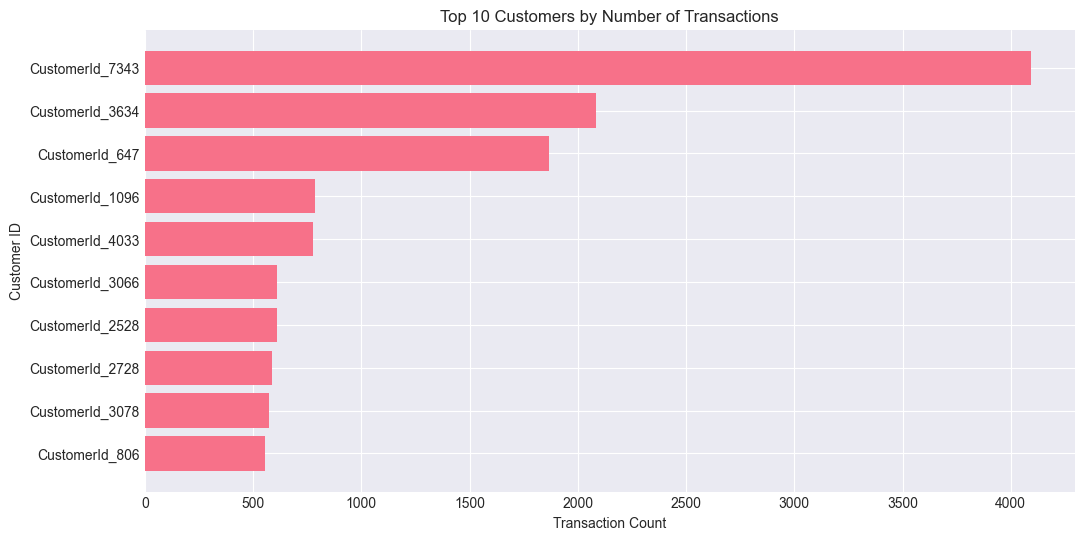

In [10]:
# 8.1 Customer transaction statistics
customer_stats = df.groupby('CustomerId').agg({
    'TransactionId': 'count',
    'Amount': ['sum', 'mean', 'std'],
    'Value': 'sum'
}).round(2)

customer_stats.columns = ['TransactionCount', 'TotalAmount', 'AvgAmount', 'StdAmount', 'TotalValue']

print("Customer Statistics Summary:")
print(customer_stats.describe())

# 8.2 Top customers by transaction count
top_customers = customer_stats.nlargest(10, 'TransactionCount')
plt.figure(figsize=(12, 6))
plt.barh(top_customers.index.astype(str), top_customers['TransactionCount'])
plt.title('Top 10 Customers by Number of Transactions')
plt.xlabel('Transaction Count')
plt.ylabel('Customer ID')
plt.gca().invert_yaxis()
plt.show()

### 9. RFM Preliminary Analysis

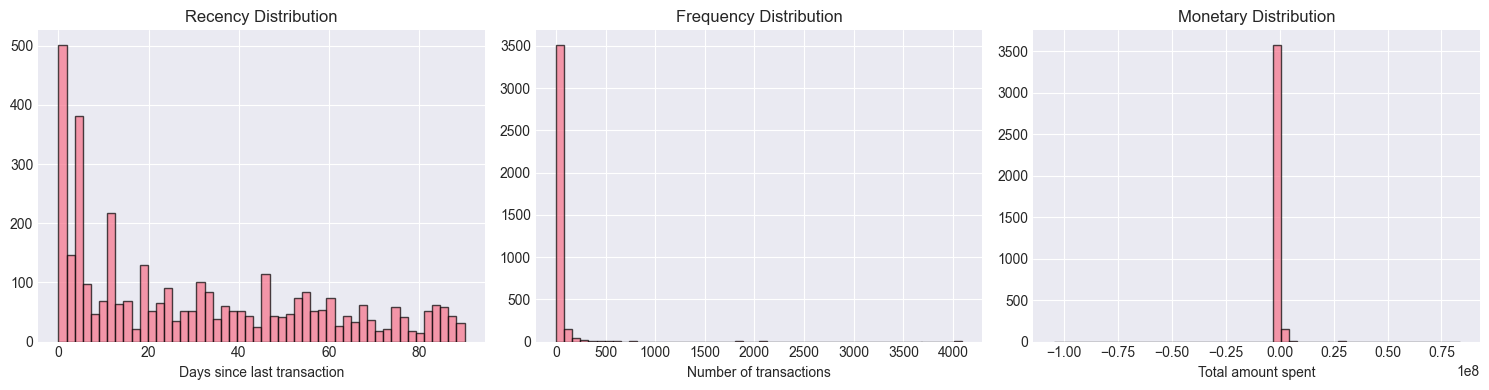

In [11]:
# 9.1 Calculate basic RFM metrics
latest_date = df['TransactionStartTime'].max()

rfm_df = df.groupby('CustomerId').agg({
    'TransactionStartTime': lambda x: (latest_date - x.max()).days,  # Recency
    'TransactionId': 'count',  # Frequency
    'Amount': 'sum'  # Monetary
}).rename(columns={
    'TransactionStartTime': 'Recency',
    'TransactionId': 'Frequency',
    'Amount': 'Monetary'
})

# 9.2 RFM distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(rfm_df['Recency'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Days since last transaction')

axes[1].hist(rfm_df['Frequency'], bins=50, edgecolor='black', alpha=0.7)
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Number of transactions')

axes[2].hist(rfm_df['Monetary'], bins=50, edgecolor='black', alpha=0.7)
axes[2].set_title('Monetary Distribution')
axes[2].set_xlabel('Total amount spent')

plt.tight_layout()
plt.show()

### 10. Fraud Analysis

Fraud by Product Category:
                    TotalTransactions  FraudRate  FraudCount
ProductCategory                                             
transport                          25   0.080000           2
utility_bill                     1920   0.006250          12
financial_services              45405   0.003546         161
airtime                         45027   0.000400          18
data_bundles                     1613   0.000000           0
other                               2   0.000000           0
movies                            175   0.000000           0
ticket                            216   0.000000           0
tv                               1279   0.000000           0


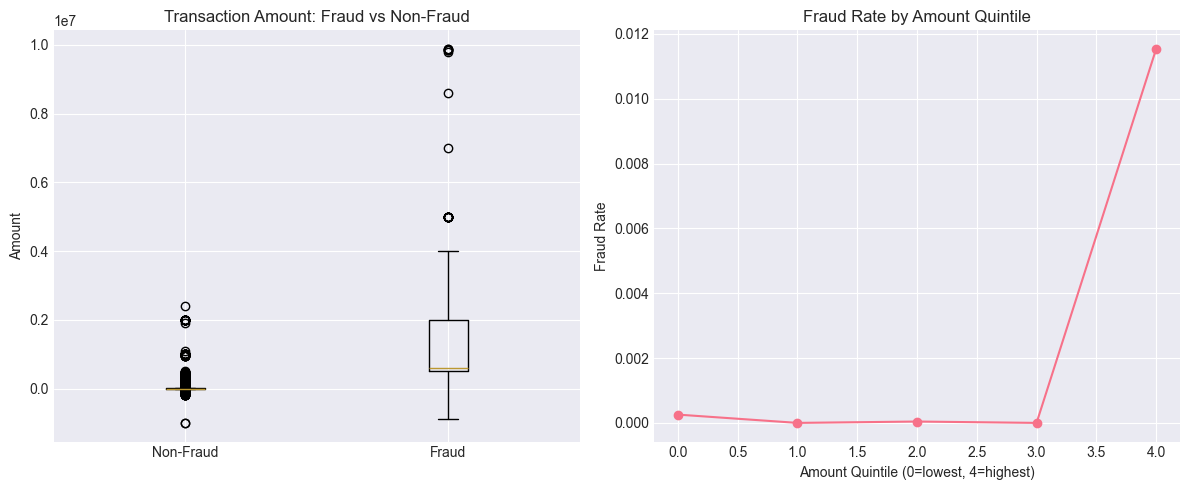

In [12]:
# 10.1 Fraud patterns by category
fraud_by_category = df.groupby('ProductCategory')['FraudResult'].agg(['count', 'mean', 'sum'])
fraud_by_category = fraud_by_category.rename(columns={
    'count': 'TotalTransactions',
    'mean': 'FraudRate',
    'sum': 'FraudCount'
}).sort_values('FraudRate', ascending=False)

print("Fraud by Product Category:")
print(fraud_by_category.head(10))

# 10.2 Fraud by amount
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Fraud vs Non-fraud amount distribution
fraud_amounts = df[df['FraudResult'] == 1]['Amount']
non_fraud_amounts = df[df['FraudResult'] == 0]['Amount']

axes[0].boxplot([non_fraud_amounts, fraud_amounts], labels=['Non-Fraud', 'Fraud'])
axes[0].set_title('Transaction Amount: Fraud vs Non-Fraud')
axes[0].set_ylabel('Amount')

# Fraud rate by amount quintile
df['AmountQuintile'] = pd.qcut(df['Amount'], 5, labels=False)
fraud_by_quintile = df.groupby('AmountQuintile')['FraudResult'].mean()
axes[1].plot(fraud_by_quintile.index, fraud_by_quintile.values, marker='o')
axes[1].set_title('Fraud Rate by Amount Quintile')
axes[1].set_xlabel('Amount Quintile (0=lowest, 4=highest)')
axes[1].set_ylabel('Fraud Rate')
axes[1].grid(True)

plt.tight_layout()
plt.show()